In [18]:
import sys
sys.path.insert(0, "../..")

import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

from module.base.network import Network

from module.simulation.meanfield import MeanField
from module.simulation.quick_meanfield2 import QuickMeanField2
from module.simulation.meanfield2 import MeanField2
from module.simulation.set_meanfield2 import SetMeanField2

import module.components.CONST as CONST
from module.components.lawrence_dist import LawrenceDist
from module.components.discrete_gaussian1D import DiscreteGaussian1D

from module.components.Adam import Adam

/tmp/ipykernel_355/2518882948.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


---

In [194]:
mean = 4.0001
d = mean - np.floor(mean)
var = (2 - d) * (1 + d) - 0.2
n0 = np.floor(mean) - 1
phase_space = np.arange(n0, n0 + 4)

In [195]:
alpha = -(d + 1) ** 2 + 5 * (d + 1) - 6 - var
beta = 2 - d
p0_opt = 1/40 * (2 - 10 * alpha - 8 * beta)

In [196]:
def calc_rest(p0):
    p1 = -0.5 * (alpha + 6 * p0)
    p2 = alpha + beta + 3*p0
    p3 = 1 - p0 - p1 - p2
    return p1, p2, p3

In [197]:
p0 = p0_opt
a = 0.5 * (var - d * (1 - d))
p0 = np.clip(p0, 0, a* (2-d)/3)

p1, p2, p3 = calc_rest(p0)
probs = np.array([p0,p1,p2,p3])

In [198]:
print("total:", np.sum(probs))
print("target mean:", mean)
print("mean:", np.sum(phase_space * probs))
print("target var:", var)
print("var:", np.sum(phase_space ** 2 * probs) - np.sum(phase_space * probs)**2)

total: 1.0
target mean: 4.0001
mean: 4.0001
target var: 1.8000999899999999
var: 1.8000999899999997


In [199]:
print(probs)

[5.9997e-01 9.9990e-02 1.0000e-05 3.0003e-01]


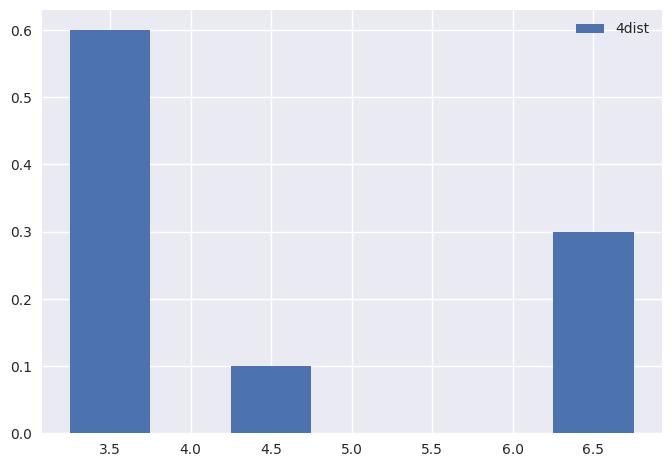

In [200]:
plt.bar(phase_space+0.5, probs, width=0.5, label = "4dist")
plt.legend()